# Download Dataset from Kaggle


In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nikofebrianur","key":"810ec23d2854ccf178bc5381ff137e66"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d mnassrib/jena-climate

jena-climate.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!mkdir jena-climate
!unzip jena-climate.zip -d jena-climate
!ls jena-climate

mkdir: cannot create directory ‘jena-climate’: File exists
Archive:  jena-climate.zip
replace jena-climate/jena_climate_2009_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: jena-climate/jena_climate_2009_2016.csv  
jena_climate_2009_2016.csv


# Load Dataset


In [6]:
import pandas as pd
data_train = pd.read_csv('jena-climate/jena_climate_2009_2016.csv')
data_train.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [7]:
data_train.rename(columns = {'Date Time':'datetime', 
                     'p (mbar)':'p',
                     'T (degC)':'tempc', 
                     'Tpot (K)':'tpot',
                     'Tdew (degC)':'tdew',
                     'VPmax (mbar)':'vpmax',
                     'VPact (mbar)':'vpact',
                     'VPdef (mbar)':'vdef',
                     'H2OC (mmol/mol)':'h20c',
                     }, inplace = True)

In [8]:
data_train.columns


Index(['datetime', 'p', 'tempc', 'tpot', 'tdew', 'rh (%)', 'vpmax', 'vpact',
       'vdef', 'sh (g/kg)', 'h20c', 'rho (g/m**3)', 'wv (m/s)',
       'max. wv (m/s)', 'wd (deg)'],
      dtype='object')

In [9]:
data_train.shape

(420551, 15)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datetime       420551 non-null  object 
 1   p              420551 non-null  float64
 2   tempc          420551 non-null  float64
 3   tpot           420551 non-null  float64
 4   tdew           420551 non-null  float64
 5   rh (%)         420551 non-null  float64
 6   vpmax          420551 non-null  float64
 7   vpact          420551 non-null  float64
 8   vdef           420551 non-null  float64
 9   sh (g/kg)      420551 non-null  float64
 10  h20c           420551 non-null  float64
 11  rho (g/m**3)   420551 non-null  float64
 12  wv (m/s)       420551 non-null  float64
 13  max. wv (m/s)  420551 non-null  float64
 14  wd (deg)       420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [11]:
data_train.isnull().sum()

datetime         0
p                0
tempc            0
tpot             0
tdew             0
rh (%)           0
vpmax            0
vpact            0
vdef             0
sh (g/kg)        0
h20c             0
rho (g/m**3)     0
wv (m/s)         0
max. wv (m/s)    0
wd (deg)         0
dtype: int64

In [12]:
data_train['datetime']=pd.to_datetime(data_train['datetime'])
data_train['datetime'].head()
data_train['tempc'].fillna(data_train['tempc'].mean(), inplace=True)
data_train = data_train[['datetime','tempc' ]]
data_train.head()

,datetime,tempc
0,2009-01-01 00:10:00,-8.02
1,2009-01-01 00:20:00,-8.41
2,2009-01-01 00:30:00,-8.51
3,2009-01-01 00:40:00,-8.31
4,2009-01-01 00:50:00,-8.27


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420551 non-null  datetime64[ns]
 1   tempc     420551 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 MB


# Model & Plot

In [14]:
dates = data_train['datetime'].values
temp = data_train['tempc'].values

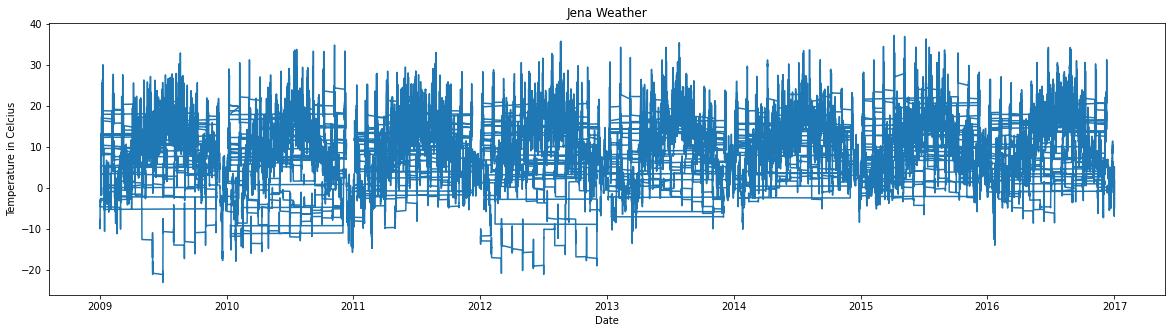

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(dates,temp)
plt.title('Jena Weather')
plt.xlabel('Date')
plt.ylabel('Temperature in Celcius')
plt.show()

In [16]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(temp, dates, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

336440 84111


In [18]:
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [19]:
max = data_train['tempc'].max()
print('Max value : ' )
print(max)

Max value : 
37.28


In [20]:
min = data_train['tempc'].min()
print('Min Value : ')
print(min)

Min Value : 
-23.01


In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< 3.3):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [30]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=500, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/500
3364/3364 [==============================] - 95s 28ms/step - loss: 2.9298 - mae: 3.3870 - val_loss: 2.9467 - val_mae: 3.4045
Epoch 2/500
3364/3364 [==============================] - 84s 25ms/step - loss: 2.8622 - mae: 3.3181 - val_loss: 2.8905 - val_mae: 3.3469
Epoch 3/500
3360/3364 [============================>.] - ETA: 0s - loss: 2.8014 - mae: 3.2558
MAE of the model < 10% of data scale
3364/3364 [==============================] - 85s 25ms/step - loss: 2.8019 - mae: 3.2563 - val_loss: 2.8354 - val_mae: 3.2902


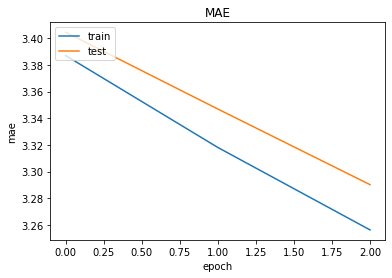

In [31]:
# plot of mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

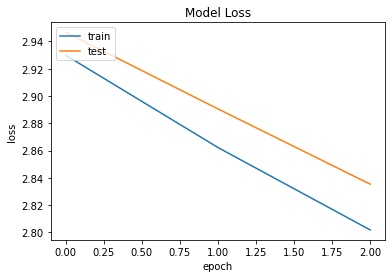

In [32]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()